In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_data" 

In [2]:
%mkdir /content/data
%cd /content/data

[WinError 3] The system cannot find the path specified: '/content/data'
e:\Macinfy lect\20. CNN Part 3\lect_Notebook


The syntax of the command is incorrect.


In [3]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
%%capture --no-display

! unzip /content/data/brain-tumor-mri-dataset.zip

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os 
import glob
import pathlib 
from tqdm import tqdm
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [12]:
glioma = list(glob.glob('/content/data/Training/glioma/*'))
meningioma = list(glob.glob('/content/data/Training/meningioma/*'))
notumor = list(glob.glob('/content/data/Training/notumor/*'))
pituitary = list(glob.glob('/content/data/Training/pituitary/*'))

In [13]:
glioma[0]

'/content/data/Training/glioma/Tr-gl_1160.jpg'

In [20]:

# images = []
# labels = []
# for image_path in tqdm(glioma):
#     image = cv2.imread(image_path)
#     images.append(image)
#     labels.append(glioma)

100%|██████████| 1321/1321 [00:00<00:00, 9596.14it/s]


In [7]:
def get_images(images_class,images_path):
  
  data_path = images_path 

  images_full_path = glob.glob(data_path+images_class+"/*.jpg") # full images path

  images = []
  labels = []
  for image_path in tqdm(images_full_path):
    image = cv2.imread(image_path)
    images.append(image)
    labels.append(images_class) 
    
  return images , labels

In [8]:
glioma_images , glioma = get_images(images_class='glioma', images_path=r'Training/')

100%|██████████| 1321/1321 [00:07<00:00, 187.05it/s]


In [9]:
def sample(images,labels,ii):

  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      img = cv2.cvtColor(images[i+ii], cv2.COLOR_BGR2RGB)
      
      plt.imshow(img,cmap='gray')
      plt.xlabel(labels[0],fontsize=18)

  plt.show()

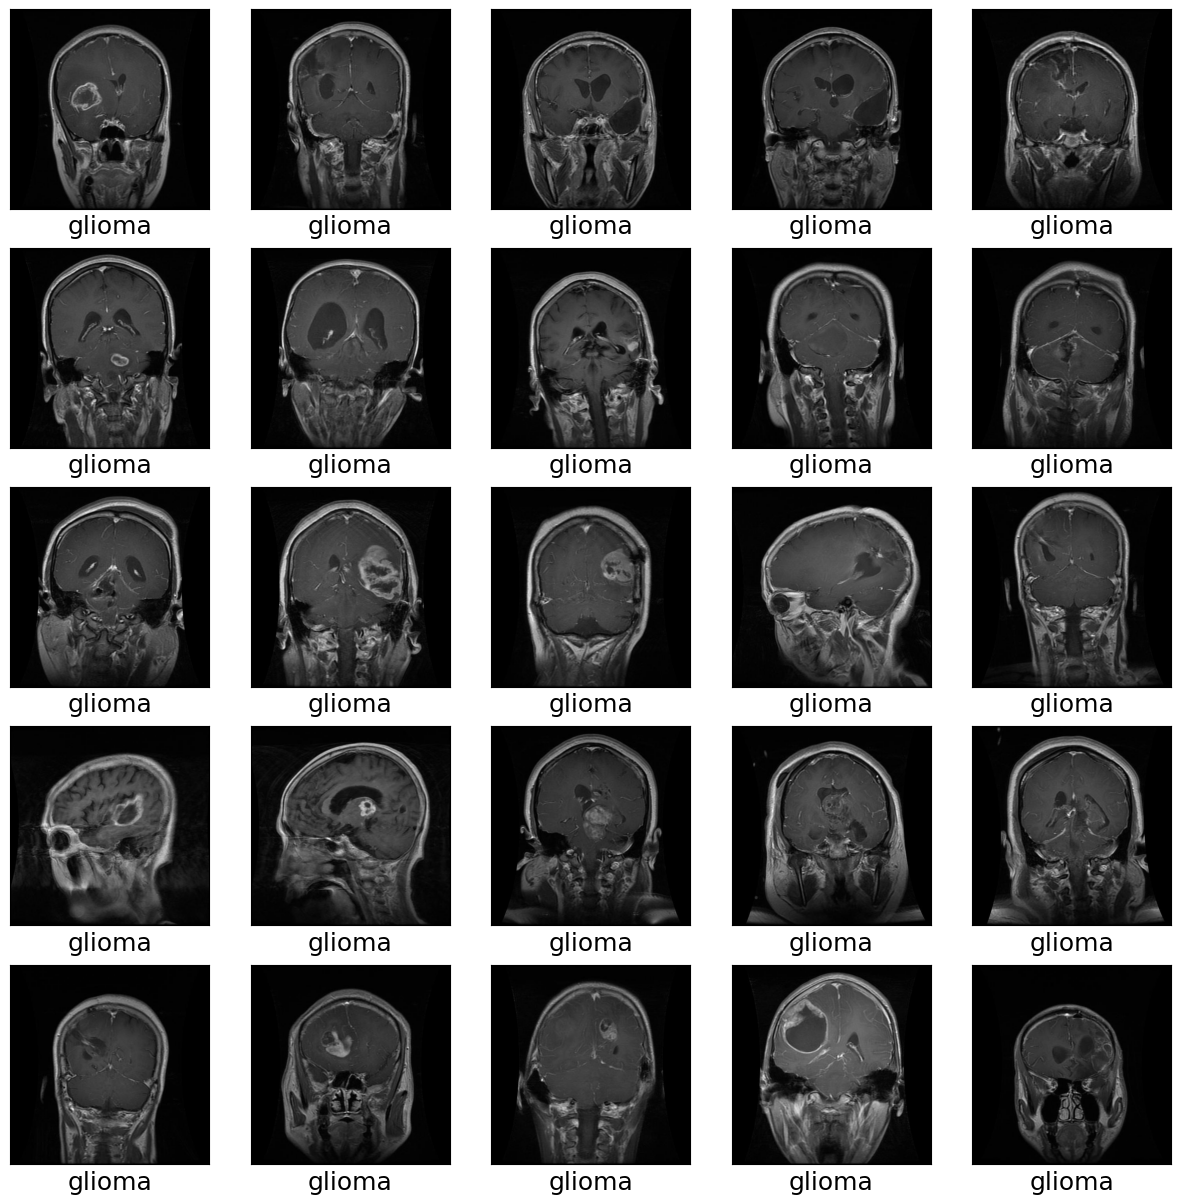

In [10]:
sample(glioma_images,glioma,9)

In [12]:
meningioma_images , meningioma = get_images(images_class='meningioma', images_path=r'Training/')

100%|██████████| 1339/1339 [00:08<00:00, 148.82it/s]


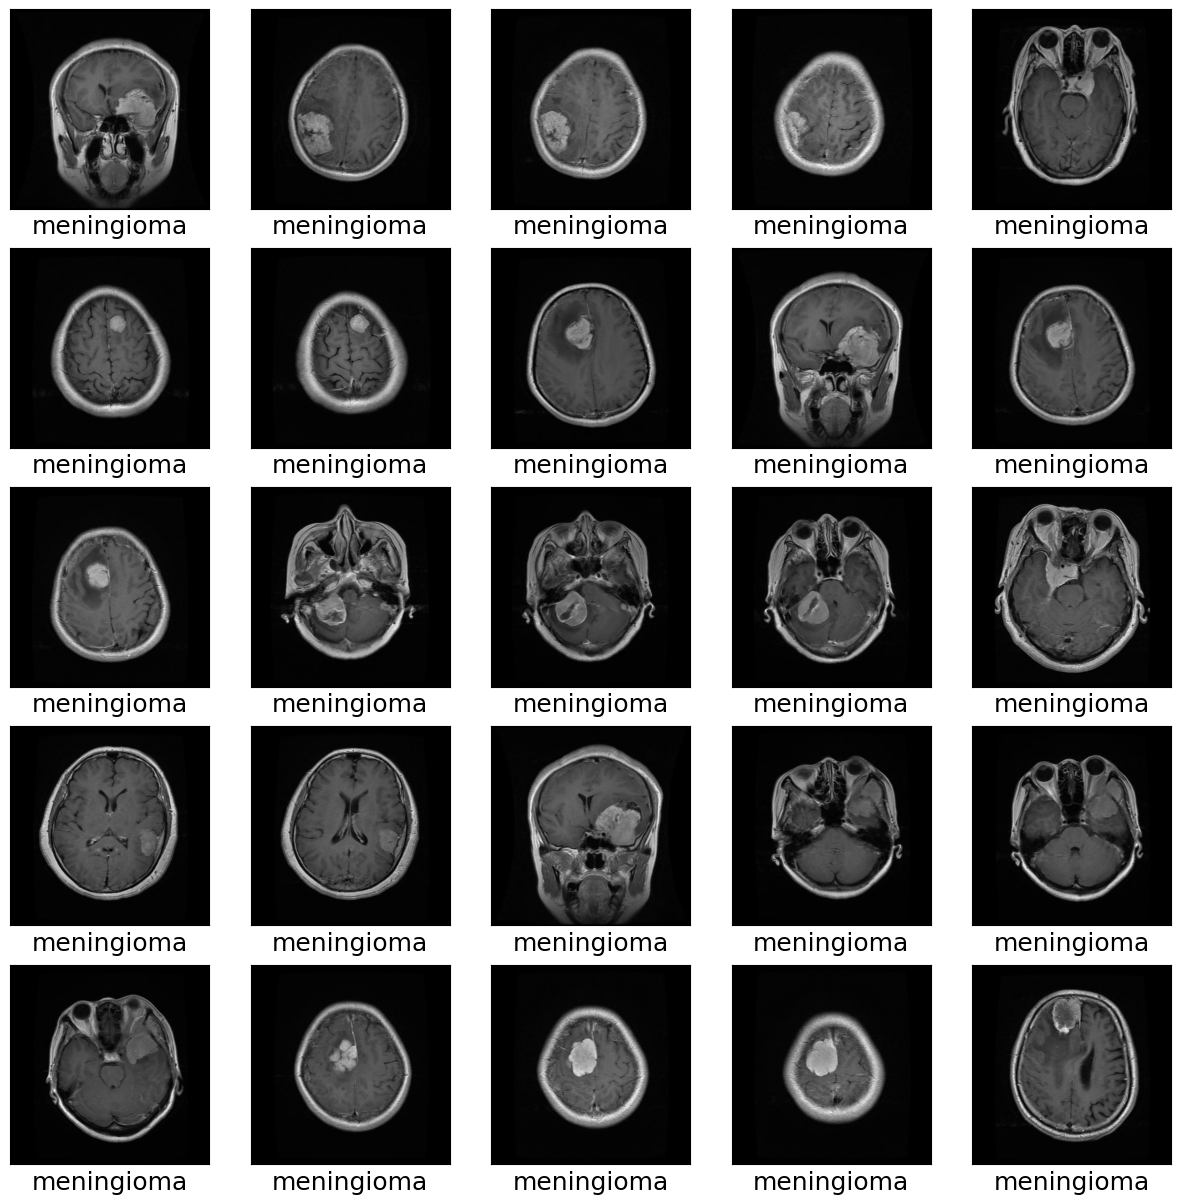

In [13]:
sample(meningioma_images,meningioma ,9)

In [14]:
notumor_images , notumor = get_images(images_class='notumor', images_path=r'Training/')

100%|██████████| 1595/1595 [00:08<00:00, 186.26it/s]


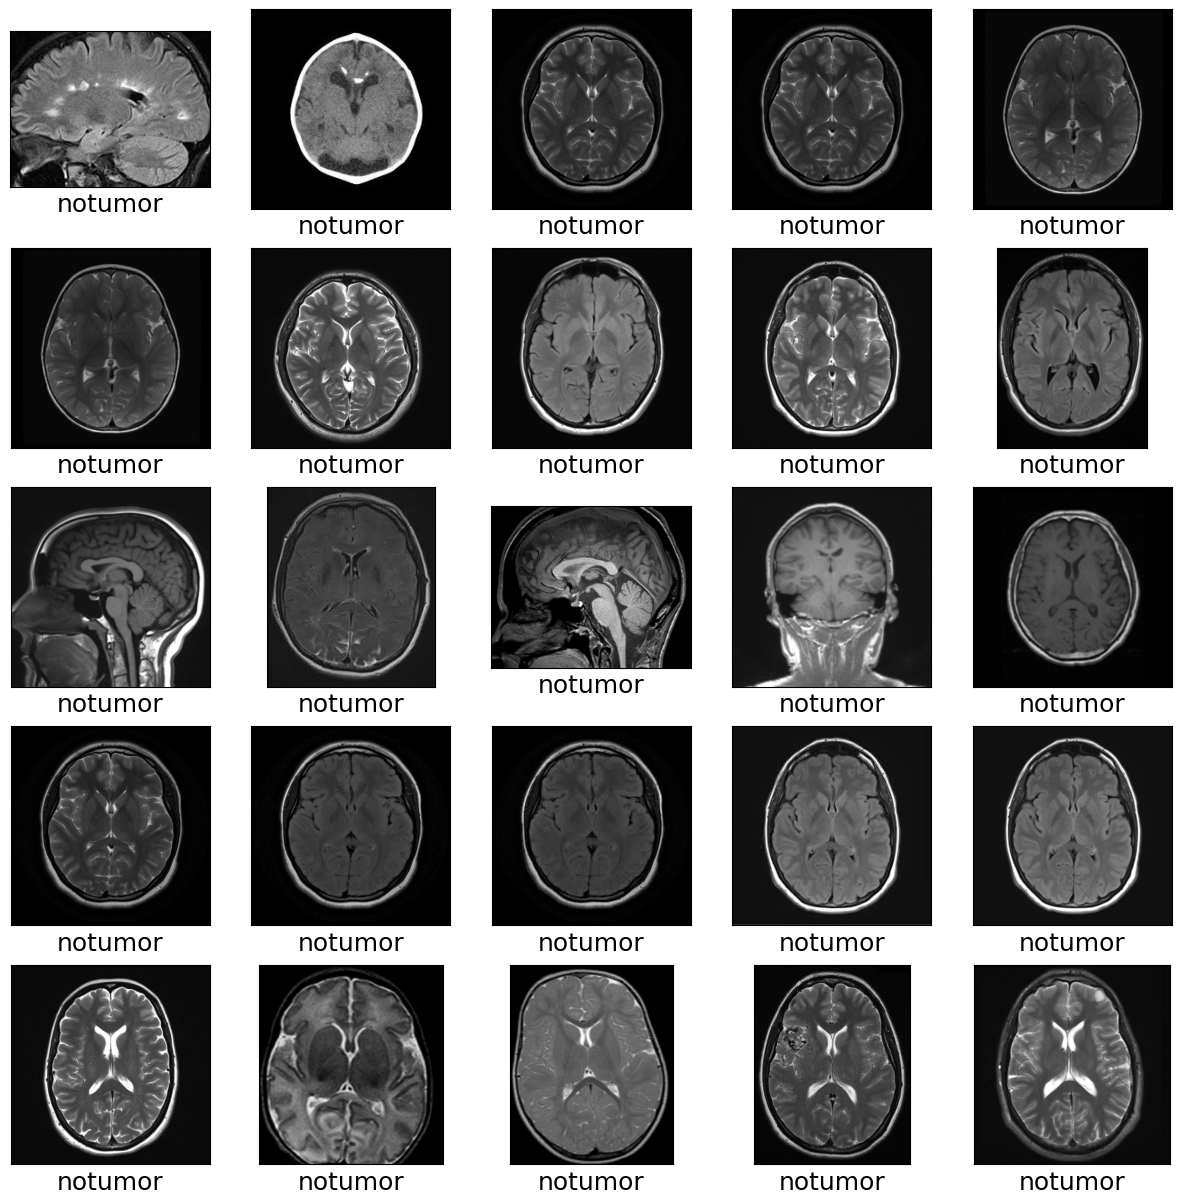

In [15]:
sample(notumor_images,notumor ,9)

In [16]:
pituitary_images , pituitary = get_images(images_class='pituitary', images_path=r'Training/')

100%|██████████| 1457/1457 [00:09<00:00, 154.27it/s]


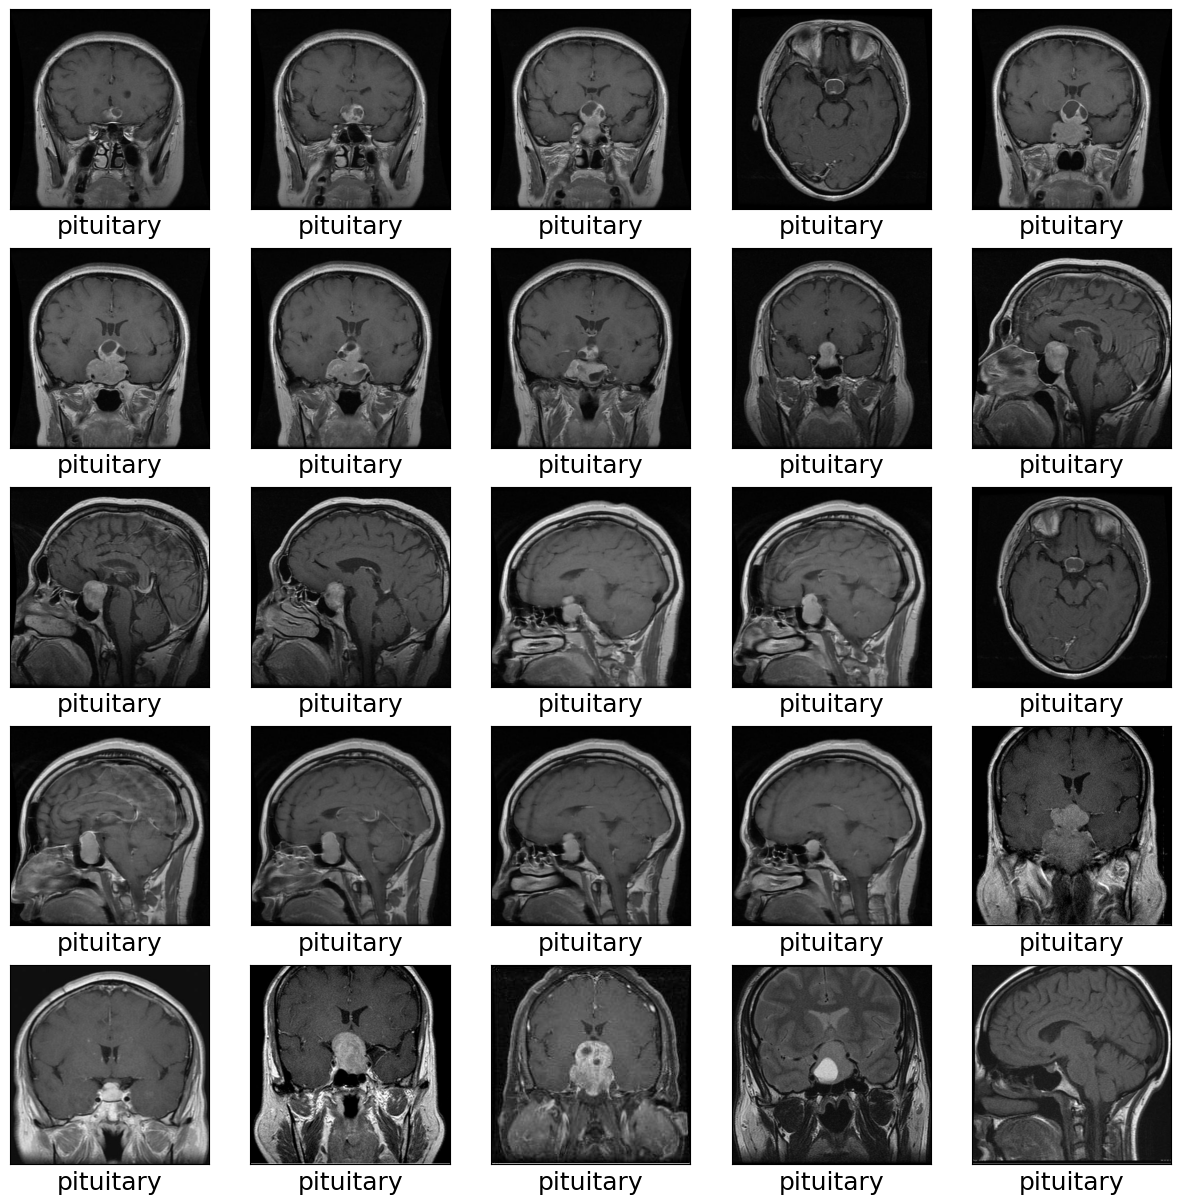

In [17]:
sample(pituitary_images,pituitary ,9)

In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout , BatchNormalization
from keras.models import Model, Sequential
from keras.optimizers import Adam , SGD
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report

In [21]:
generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

train = generator_train.flow_from_directory('Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [22]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['categorical_accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      3200      
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     401536    
                                                                 
 batch_normalization_1 (Batc  (None, 100, 100, 128)    512       
 hNormalization)                                                 
                                                        

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [25]:
import tensorflow as tf
import datetime


# # Clear any logs from previous runs
# rm -rf ./logs/

In [27]:
model_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

log_dir = "data/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
history5 = model.fit(train, epochs=5, validation_data=test, callbacks=[model_es, model_rlr, model_mcp , tensorboard_callback])

Epoch 1/5
179/179 [==============================] - ETA: 0s - loss: 0.7193 - categorical_accuracy: 0.7348 
Epoch 1: val_categorical_accuracy improved from -inf to 0.33638, saving model to model5_weights.h5
179/179 [==============================] - 1964s 11s/step - loss: 0.7193 - categorical_accuracy: 0.7348 - val_loss: 1.6537 - val_categorical_accuracy: 0.3364 - lr: 0.0010
Epoch 2/5
179/179 [==============================] - ETA: 0s - loss: 0.4214 - categorical_accuracy: 0.8375 
Epoch 2: val_categorical_accuracy did not improve from 0.33638
179/179 [==============================] - 2046s 11s/step - loss: 0.4214 - categorical_accuracy: 0.8375 - val_loss: 1.7687 - val_categorical_accuracy: 0.2960 - lr: 0.0010
Epoch 3/5
179/179 [==============================] - ETA: 0s - loss: 0.3446 - categorical_accuracy: 0.8683
Epoch 3: val_categorical_accuracy improved from 0.33638 to 0.64836, saving model to model5_weights.h5
179/179 [==============================] - 1713s 10s/step - loss: 0.344

In [34]:
%tensorboard --logdir data/logs/fit

In [77]:
model2 =Sequential()

model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,1)))
model2.add(MaxPooling2D(2,2))
    
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
    
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
    
model2.add(Conv2D(128, (3,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.5)) 

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))

model2.add(Dense(4, activation='softmax'))

In [78]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [79]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 128)     

In [82]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 2,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-2)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=2)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [84]:
history2 = model2.fit(train, epochs=10, validation_data=test, callbacks=[es, lrd, mcp , tensorboard_callback])

Epoch 1/10
179/179 [==============================] - 268s 1s/step - loss: 0.5785 - accuracy: 0.7712 - val_loss: 0.5149 - val_accuracy: 0.7887 - lr: 0.0010
Epoch 2/10
179/179 [==============================] - 234s 1s/step - loss: 0.3868 - accuracy: 0.8515 - val_loss: 0.3549 - val_accuracy: 0.8719 - lr: 0.0010
Epoch 3/10
179/179 [==============================] - 215s 1s/step - loss: 0.3018 - accuracy: 0.8883 - val_loss: 0.2964 - val_accuracy: 0.8818 - lr: 0.0010
Epoch 4/10
179/179 [==============================] - 216s 1s/step - loss: 0.2491 - accuracy: 0.9086 - val_loss: 0.2904 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 5/10
179/179 [==============================] - 212s 1s/step - loss: 0.2058 - accuracy: 0.9216 - val_loss: 0.2427 - val_accuracy: 0.8978 - lr: 0.0010
Epoch 6/10
179/179 [==============================] - 215s 1s/step - loss: 0.1695 - accuracy: 0.9370 - val_loss: 0.1772 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 7/10
179/179 [==============================] - 213s 1s/st

In [85]:
%tensorboard --logdir data/logs/fit